# Tranquilizers


It was asked about personal use of any form of prescription tranquilizers that were not prescribed for a someone or that someone took only for the experience or feeling they caused.

In [11]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [12]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [13]:
case_quest_data = dataset.ix[:,0:2].copy()
tranquilizers = dataset.ix[:,'KLONOPIN':'TRDAYPWK'].copy() # tranquilizers dataset

### 1. How many cases used the drug
There are 4703 cases who use tranquilizers and 50400 cases who never use tranquilizers in the survey.

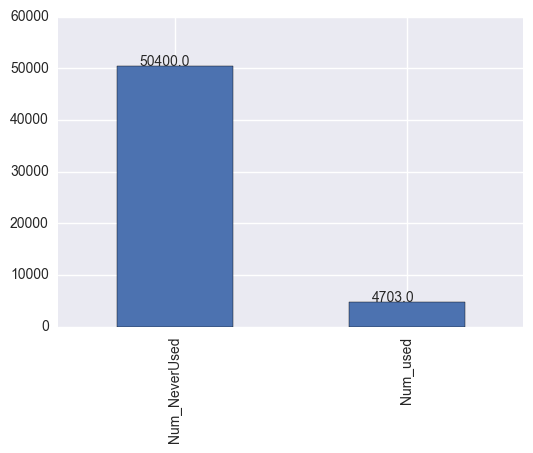

In [14]:

Num_NeverUsed=tranquilizers.query('KLONOPIN ==91').shape[0]
Num_used=tranquilizers.query('(KLONOPIN ==1)|(XNAXATVN ==1)|(VALMDIAZ ==1)|(TRNCARD ==1)').shape[0]
Num =  {"Num":{"Num_NeverUsed":Num_NeverUsed, "Num_used":Num_used }}
DF_Num=pd.DataFrame(Num).sort_values('Num', ascending = False)

ax = DF_Num['Num'].plot.bar()

for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1 , p.get_height()+50))

###  2.What are their age range?

Those who used tranquilizers are concetrated at 18 years old. Besides we can see there are more people used tranquilizers in a old age. 

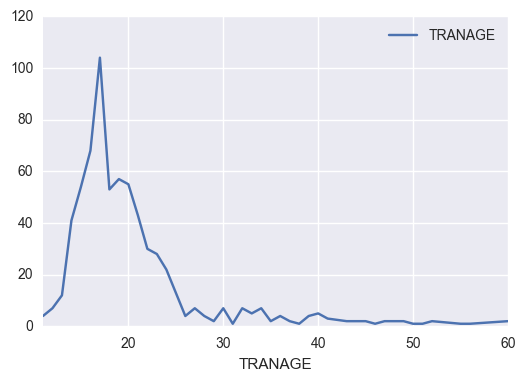

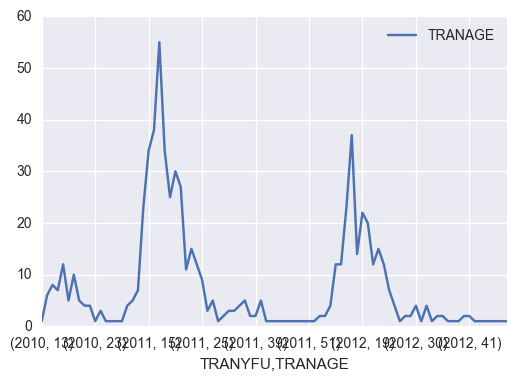

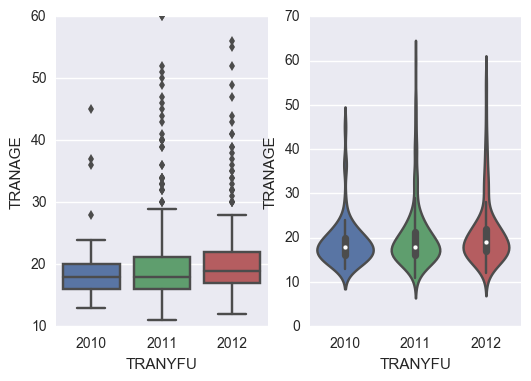

In [15]:
#query_data those who have used any one of the hallucinogens
tranquilizers_1=tranquilizers.query('((KLONOPIN ==1)|(XNAXATVN ==1)|(VALMDIAZ ==1)|(TRNCARD ==1))&(TRANAGE <69)&(TRANYFU<=2013)')
count = tranquilizers_1.groupby('TRANAGE').agg({ 'TRANAGE': 'count'})
count.plot()

#hallucinogens_LSD.plot(kind='scatter', x='HALLAGE',y='LSD')

# year & age
count_year = tranquilizers_1.groupby(['TRANYFU','TRANAGE']).agg({ 'TRANAGE': 'count'})
count_year.plot()

tranquilizers_1.plot(kind='scatter', x='TRANYFU',y='TRANAGE')

#playing with categories ... seaborn is pretty good with it
#plt.figure(figsize=(40,20))
plt.subplot(121)
sns.boxplot(x='TRANYFU',y='TRANAGE',data=tranquilizers_1)

plt.subplot(122)
sns.violinplot(x='TRANYFU',y='TRANAGE',data=tranquilizers_1)


### 3.How frequently they use it?
The people used them below 25 times. Moreover, some cases used very frequently about 160 times per year.
Those who ever used tranquilizers are more frequent. 

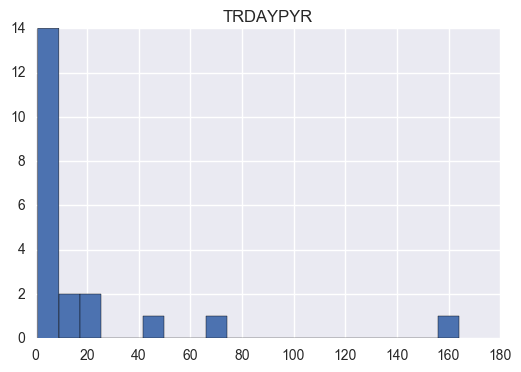

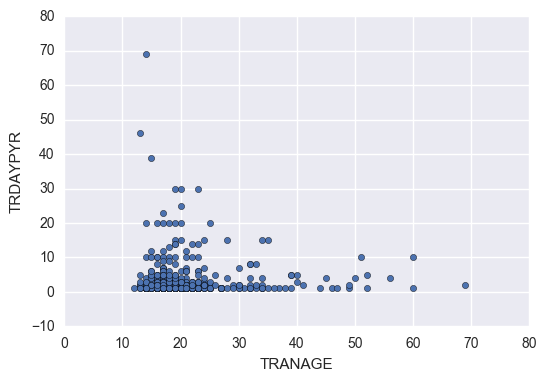

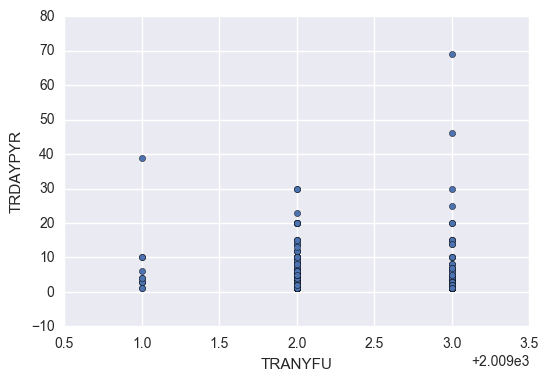

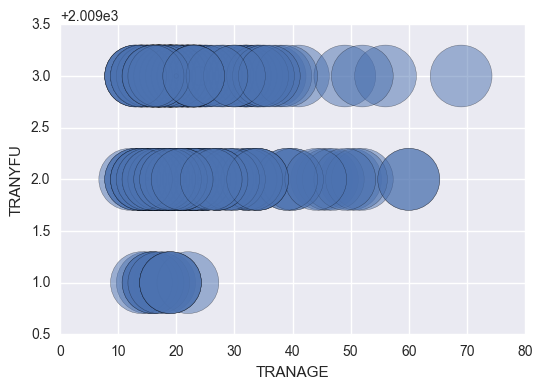

In [22]:
tranquilizers_fre=tranquilizers.query('(TRDAYPYR<985)&(TRANAGE <=69)& (TRANYFU<=2012)')
count_days = tranquilizers_fre.groupby('TRDAYPYR').agg({ 'TRDAYPYR': 'count'})
count_days.hist(bins=20)

tranquilizers_fre.plot(kind='scatter', x='TRANAGE',y='TRDAYPYR')
tranquilizers_fre.plot(kind='scatter', x='TRANYFU',y='TRDAYPYR')
tranquilizers_fre.plot(kind='scatter', x='TRANAGE',y='TRANYFU',s=tranquilizers['TRDAYPYR']*2,alpha=0.5)

### 4.Did they stop and go back to it? Are they planning to quit?

* 1 = Within the past 30 days
* 2 = More than 30 days ago but within the past 12 mons
* 3 = More than 12 months ago 
There are 3127 cases who quit the drug , 1025 cases who used the drug within the past 30 days and 508 cases who used the drug more than 30 days in the past year. 
There are about half of people quit the drug.

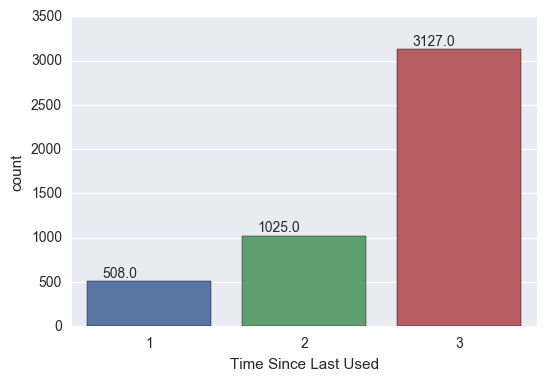

In [17]:

tranquilizers_quit=tranquilizers.query('TRANREC<4')
ax = sns.countplot(tranquilizers_quit['TRANREC'])
plt.xlabel('Time Since Last Used')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

## Next

[Stimulants](Stimulants.ipynb)